In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [3]:
audi_data = pd.read_csv('data/audi.csv')
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi_data.shape

(10668, 9)

In [5]:
audi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
audi_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [7]:
audi_data.describe(include='object')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


In [8]:
temp_data = audi_data.copy()

In [9]:
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

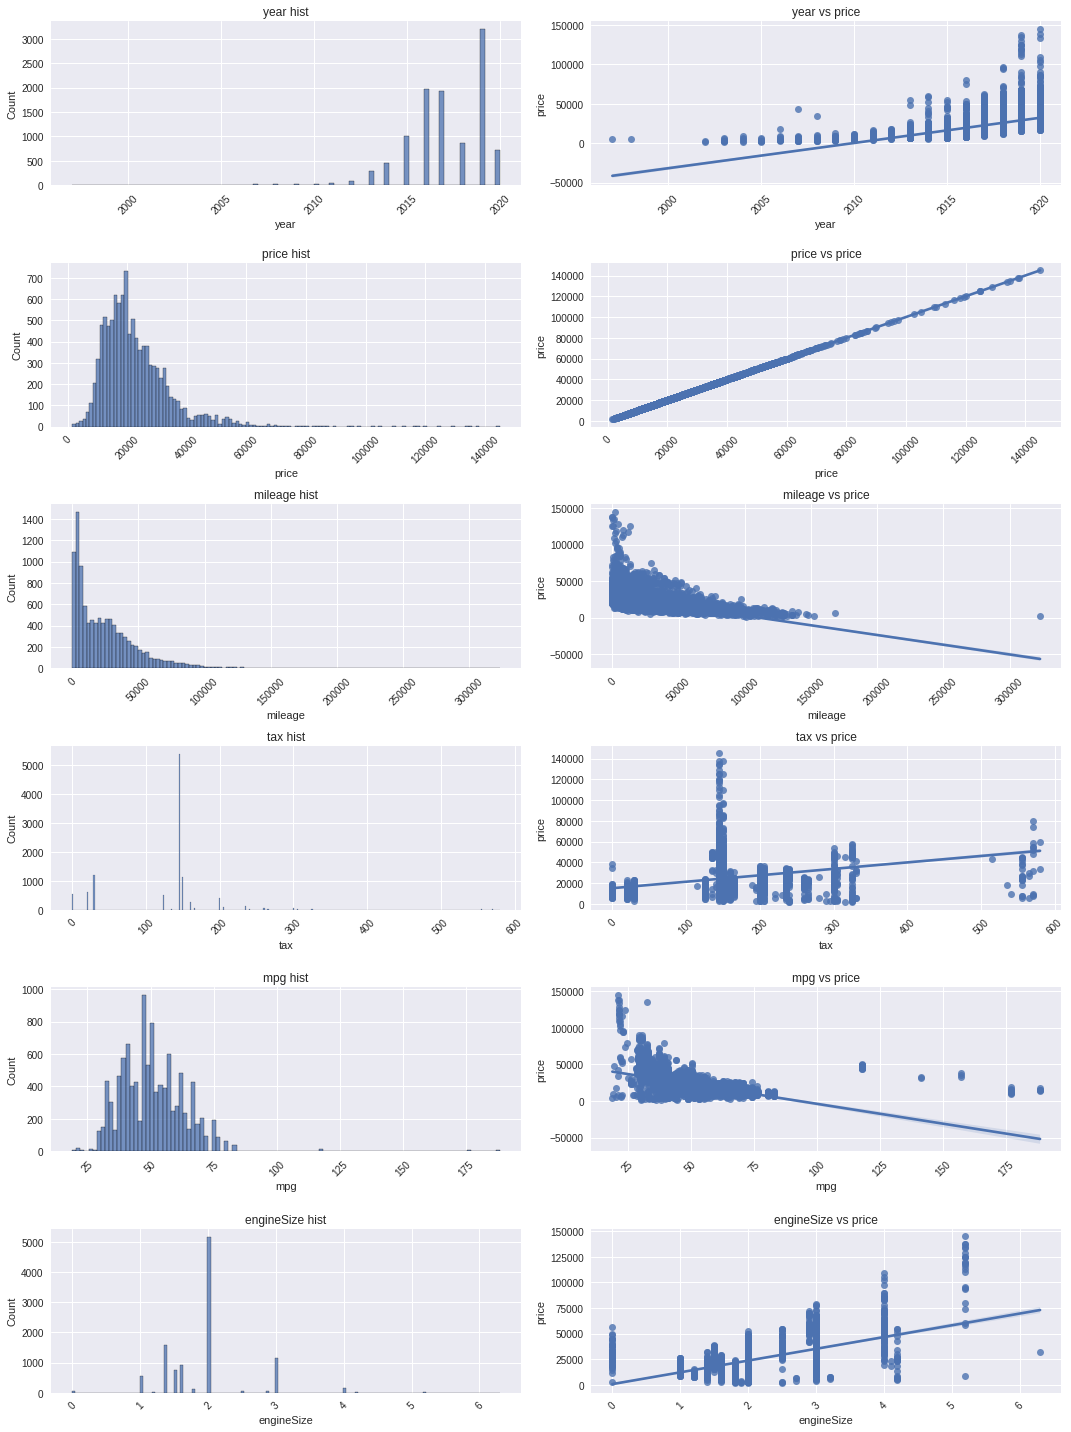

In [10]:
n = len(num_features)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(15, 20))

for i, feature in enumerate(num_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    regplot = sns.regplot(data=temp_data, x=feature, y='price', ax=axes[i][1])
    regplot.set_title(f'{feature} vs price')
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()
    

<AxesSubplot:>

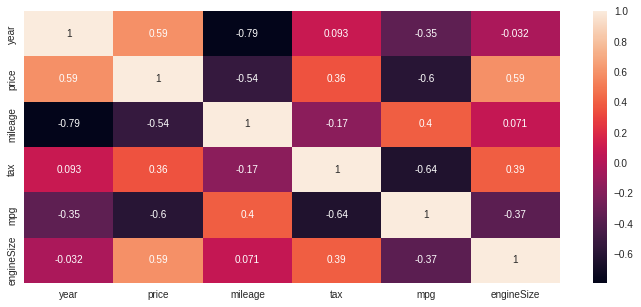

In [11]:
fig = plt.figure(figsize=(12, 5))
sns.heatmap(temp_data.corr(), annot=True)

In [12]:
dummy_data = pd.get_dummies(temp_data)
dummy_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [13]:
X = dummy_data.drop('price', axis=1)
y = dummy_data['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8534, 37)
Test shape: (2134, 37)


In [15]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [16]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.893
Train MAE: 2550.204
Train MAPE: 13.383


Test R^2: 0.887
Test MAE: 2613.726
Test MAPE: 12.876


In [17]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_lr = linear_model.SGDRegressor(random_state=42)
sgd_lr.fit(X_train_scaled, y_train)
y_train_predict = sgd_lr.predict(X_train_scaled)
y_test_predict = sgd_lr.predict(X_test_scaled)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.888
Train MAE: 2566.030
Train MAPE: 13.819


Test R^2: 0.884
Test MAE: 2601.702
Test MAPE: 12.876


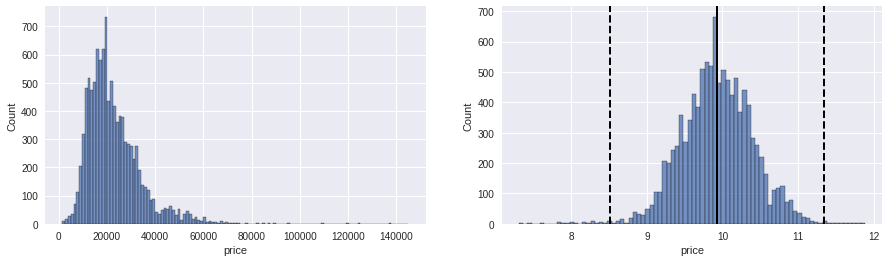

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(data=temp_data, x='price', ax=ax[0])
log_price = np.log(temp_data['price'])
sns.histplot(data=log_price, ax=ax[1])
ax[1].axvline(log_price.mean(), color='k', lw=2)
ax[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
ax[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2)

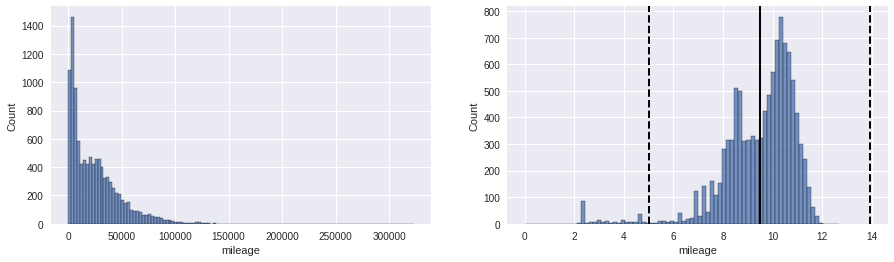

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(data=temp_data, x='mileage', ax=ax[0])
log_price = np.log(temp_data['mileage'])
sns.histplot(data=log_price, ax=ax[1])
ax[1].axvline(log_price.mean(), color='k', lw=2)
ax[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
ax[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2)

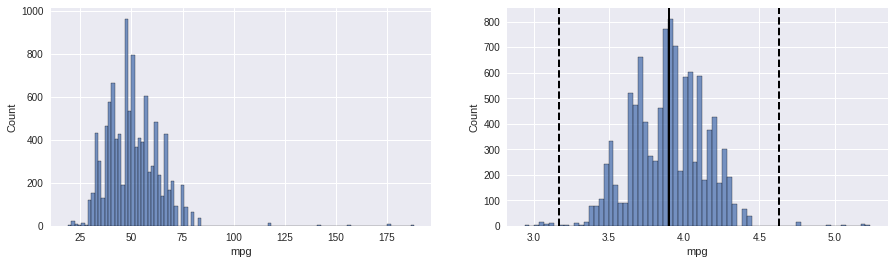

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(data=temp_data, x='mpg', ax=ax[0])
log_price = np.log(temp_data['mpg'])
sns.histplot(data=log_price, ax=ax[1])
ax[1].axvline(log_price.mean(), color='k', lw=2)
ax[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
ax[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2)

In [21]:
def outliers_z_score(data, feature, log_scale = False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound)|(x > upper_bound)]
    cleaned = data[(x > lower_bound)&(x < upper_bound)]
    
    return outliers, cleaned

_, temp_cleaned = outliers_z_score(temp_data, 'price', True)
_, temp_cleaned = outliers_z_score(temp_cleaned, 'mileage', True)
_, temp_cleaned = outliers_z_score(temp_cleaned, 'mpg', True)

print(f'Shape before cleaned: {temp_data.shape}')
print(f'Shape after cleaned: {temp_cleaned.shape}')
 

Shape before cleaned: (10668, 9)
Shape after cleaned: (10308, 9)


In [22]:
dummy_data = pd.get_dummies(temp_cleaned)
dummy_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A5,...,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,17300,1998,145,49.6,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
X = dummy_data.drop('price', axis=1)
y = dummy_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8246, 35)
Test shape: (2062, 35)


In [24]:
y_train_log = np.log(y_train)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)
y_train_predict = np.exp(lr.predict(X_train))
y_test_predict = np.exp(lr.predict(X_test))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)


Train R^2: 0.927
Train MAE: 1959.201
Train MAPE: 8.712


Test R^2: 0.917
Test MAE: 2060.712
Test MAPE: 9.061


In [27]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_test_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print(f'Train shape: {X_train_scaled_poly.shape}')
print(f'Test shape: {X_test_scaled_poly.shape}')



Train shape: (8246, 665)
Test shape: (2062, 665)


In [30]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)


y_train_predict = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.946
Train MAE: 1714.759
Train MAPE: 7.798


Test R^2: 0.934
Test MAE: 1826.895
Test MAPE: 8.184


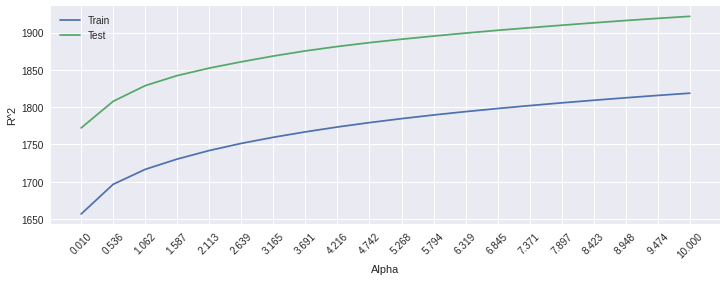

In [33]:
alpha_list = np.linspace(0.01, 10, 20)

train_score = []
test_score = []

for alpha in alpha_list:
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    y_train_predict = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    
    train_score.append(metrics.mean_absolute_error(y_train, y_train_predict))
    test_score.append(metrics.mean_absolute_error(y_test, y_test_predict))
    
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(alpha_list, train_score, label='Train')
ax.plot(alpha_list, test_score, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation=45)
ax.legend()

In [34]:
ridge_lr_poly = linear_model.Ridge(alpha=0.01, max_iter=10000)
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)

y_train_predict = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.951
Train MAE: 1656.825
Train MAPE: 7.610


Test R^2: 0.937
Test MAE: 1772.183
Test MAPE: 7.994


Text(0, 0.5, 'Model')

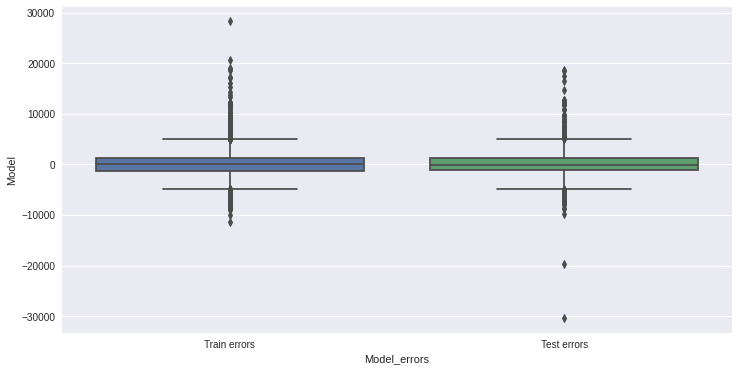

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

y_train_errors = y_train - y_train_predict
y_test_errors = y_test - y_test_predict

predict_df = pd.DataFrame({
    'Train errors': y_train_errors,
    'Test errors': y_test_errors
})

sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model_errors')
ax.set_ylabel('Model')